# Mapeando el Universo



## Análisis y Curación

### Lectura de datos

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn

In [4]:
filename = "dataset/DiploDatos.csv"

In [5]:
df = pd.read_csv(filename,index_col=0)

In [6]:
df['modelColor_ug'] = df['modelMag_u'] - df['modelMag_g']
df['modelColor_gr'] = df['modelMag_g'] - df['modelMag_r']
df['modelColor_ri'] = df['modelMag_r'] - df['modelMag_i']
df['modelColor_iz'] = df['modelMag_i'] - df['modelMag_z']
df['petroColor_ug'] = df['petroMag_u'] - df['petroMag_g']
df['petroColor_gr'] = df['petroMag_g'] - df['petroMag_r']
df['petroColor_ri'] = df['petroMag_r'] - df['petroMag_i']
df['petroColor_iz'] = df['petroMag_i'] - df['petroMag_z']

### Uniendo dataframes

* Vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [7]:
filename = 'dataset/DiploDatos_Zoo.csv'

In [8]:
zoo = pd.read_csv(filename,index_col=0)

In [9]:
dd = df.join(zoo)

In [10]:
df[:5]

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,extinction_i,extinction_z,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,0.051128,0.038030,0.76524,0.25431,0.09500,0.11706,0.79000,0.35837,0.15143,0.10247
957066087332079616,0.141718,0.000031,0,null,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,0.051117,0.038022,1.95531,1.07714,0.45090,0.35530,2.11901,1.03352,0.43049,0.27852
957065537576265728,0.140137,0.000023,0,null,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,0.051345,0.038191,1.36642,0.85273,0.41891,0.31316,1.07275,0.76730,0.36148,0.22301
957066911965800448,0.066672,0.000016,0,null,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,0.053670,0.039920,1.98755,0.92406,0.42804,0.32709,1.90482,0.94006,0.41266,0.26840
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,0.051693,0.038450,1.04630,0.58647,0.35715,0.14667,1.04384,0.58365,0.34532,-0.00752


-----------------------------------------------------

# **Resolución Punto 1 - Análisis general**
 
### **1.1)** Describir el conjunto de datos.

In [11]:
# Seleccionamos 33 variables con las que vamos a trabajar

important_cols = ['z', 'velDisp', 'ra', 'dec', 'subClass',
                  'modelMag_u', 'modelMag_g','modelMag_r','modelMag_i', 'modelMag_z', 
                  'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
                  'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z',
                  'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z',
                  'petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z',
                  'spiral', 'elliptical', 'uncertain',]

In [12]:
data= dd[important_cols]

In [13]:
data.dtypes

z             float64
velDisp       float64
ra            float64
dec           float64
subClass       object
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroMag_u    float64
petroMag_g    float64
petroMag_r    float64
petroMag_i    float64
petroMag_z    float64
deVRad_u      float64
deVRad_g      float64
deVRad_r      float64
deVRad_i      float64
deVRad_z      float64
expRad_u      float64
expRad_g      float64
expRad_r      float64
expRad_i      float64
expRad_z      float64
petroRad_u    float64
petroRad_g    float64
petroRad_r    float64
petroRad_i    float64
petroRad_z    float64
spiral        float64
elliptical    float64
uncertain     float64
dtype: object

In [14]:
# Descripción del conjunto de datos numéricos

data.describe().round(3)

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
count,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,...,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,621957.000,621957.000,621957.000
mean,0.147,152.105,180.985,23.170,19.357,17.631,16.840,16.340,15.969,19.320,...,1.578,1.309,10.571,5.773,5.586,5.507,5.777,0.286,0.094,0.620
std,0.113,99.785,68.994,19.353,87.577,86.220,75.435,79.185,83.465,87.580,...,79.088,83.358,18.943,5.313,4.180,4.708,5.663,0.452,0.291,0.485
min,-0.011,0.000,0.001,-11.253,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,...,-9999.000,-9999.000,0.000,0.000,0.036,0.000,0.002,0.000,0.000,0.000
25%,0.074,87.723,145.631,6.391,19.137,17.663,16.867,16.455,16.146,19.083,...,1.156,1.008,3.096,3.572,3.676,3.588,3.540,0.000,0.000,0.000
50%,0.115,142.108,183.556,21.064,19.879,18.257,17.414,16.989,16.684,19.797,...,1.611,1.496,5.494,4.864,4.811,4.657,4.626,0.000,0.000,1.000
75%,0.175,202.606,221.971,37.826,20.718,18.820,17.780,17.367,17.111,20.608,...,2.724,2.426,9.854,6.585,6.388,6.183,6.212,1.000,0.000,1.000
max,1.002,850.000,359.998,71.767,31.771,32.297,33.846,32.102,29.184,41.271,...,59.372,63.406,258.573,258.476,258.465,258.462,258.535,1.000,1.000,1.000


In [15]:
# Descripción del conjunto de datos no numéricos

data.describe(include=['object'])

,subClass
count,864064
unique,8
top,null
freq,543479


In [16]:
# Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ 
# en los nombres de las variables/columnas

data.columns[~data.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

**NOTA:**    
* No tenemos valores raros en los nombres de las variables.

### **1.2)** Tratamiento de datos duplicados

In [17]:
# Buscamos datos duplicados

data[data.duplicated(keep=False)]

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


In [18]:
# Estadísticos descriptivos del índice= specObjID

pd.Series(data.index,dtype=str).describe()

count    8.640640e+05
mean     1.631710e+18
std      8.177153e+17
min      2.994897e+17
25%      9.143824e+17
50%      1.597679e+18
75%      2.275515e+18
max      3.383417e+18
Name: specObjID, dtype: float64

**NOTA:**    
* Tenemos 864.064.000 registros.
* No se detectaron registros duplicados buscando por el índice.

### **1.3)** Tratamiento de datos faltantes.

In [19]:
# Obtenemos el número de valores faltantes por columna 

missing_values_count = data.isnull().sum()
missing_values_count[missing_values_count > 0]

spiral        242107
elliptical    242107
uncertain     242107
dtype: int64

In [20]:
# Calculamos el impacto en términos relativos que tienen los valores nulos

len(data.dropna())/len(data)

0.7198043200503667

In [21]:
# Completamos con 0 los valores faltantes

data_full = data.fillna(0)

In [22]:
missing_values_count = data_full.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

**NOTA:**   
* Tenemos 242.107 filas sin valor en las columnas: **spiral**, **elliptical** y **uncertain**.
* Eliminar valores nulos siempre es la ultima opción.
* Elegimos la opción de rellenar los valores faltantes con 0.

### **1.4)** Tratamiento de outliers.

In [23]:
# PRIMER PASO: Codificamos las variables categóricas como variables numéricas

from sklearn.preprocessing import LabelBinarizer

other_column = 'subClass'
lb = LabelBinarizer()

data_cod=pd.DataFrame(lb.fit_transform(data_full[other_column]),
                      columns=((other_column + '_') + pd.Series(lb.classes_)),
                      index=data_full.index)

In [24]:
data_cod.shape

(864064, 8)

In [25]:
# Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ 
# en los nombres de las variables/columnas

data_cod.columns[~data_cod.columns.str.match(r'^(\w+)$')]

Index(['subClass_AGN BROADLINE', 'subClass_STARBURST BROADLINE',
       'subClass_STARFORMING BROADLINE'],
      dtype='object')

In [26]:
# Reemplazamos el espacio vacío detectado en el nombre de las variables por un guión bajo

data_cod.columns = data_cod.columns.str.replace(' ', '_')
data_cod.head()

,subClass_AGN,subClass_AGN_BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST_BROADLINE,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,subClass_null
specObjID,,,,,,,,
957075158303008768,0,0,0,1,0,0,0,0
957066087332079616,0,0,0,0,0,0,0,1
957065537576265728,0,0,0,0,0,0,0,1
957066911965800448,0,0,0,0,0,0,0,1
957067186843707392,0,0,0,0,0,1,0,0


In [27]:
data_cod.dtypes

subClass_AGN                      int32
subClass_AGN_BROADLINE            int32
subClass_BROADLINE                int32
subClass_STARBURST                int32
subClass_STARBURST_BROADLINE      int32
subClass_STARFORMING              int32
subClass_STARFORMING_BROADLINE    int32
subClass_null                     int32
dtype: object

In [28]:
# SEGUNDO PASO: Unimos los dataframes 

data_full_join = data_full.join(data_cod)
data_full_join[:5]

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,elliptical,uncertain,subClass_AGN,subClass_AGN_BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST_BROADLINE,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,subClass_null
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,60.39996,197.448850,4.249896,STARBURST,18.10708,17.34184,17.08753,16.99253,16.87547,...,0.0,1.0,0,0,0,1,0,0,0,0
957066087332079616,0.141718,217.80020,197.458925,4.451149,null,19.56142,17.60611,16.52897,16.07807,15.72277,...,0.0,1.0,0,0,0,0,0,0,0,1
957065537576265728,0.140137,138.90830,197.473340,4.417710,null,19.56201,18.19559,17.34286,16.92395,16.61079,...,0.0,0.0,0,0,0,0,0,0,0,1
957066911965800448,0.066672,241.28300,197.583262,4.300230,null,18.38973,16.40218,15.47812,15.05008,14.72299,...,1.0,0.0,0,0,0,0,0,0,0,1
957067186843707392,0.183667,118.87630,197.601252,4.397977,STARFORMING,19.44434,18.39804,17.81157,17.45442,17.30775,...,0.0,0.0,0,0,0,0,0,1,0,0


In [29]:
data_full_join.shape

(864064, 41)

In [30]:
# TERCER PASO: Eliminamos la variable categórica original "subClass" que fué convertida a "Dummy"
# Eliminamos la columna subClass por ser categórica para poder normalizar los datos

data_join=data_full_join.drop(["subClass"],axis=1)
data_join.shape

(864064, 40)

In [31]:
# Guardo la columna subClass para reagregarla posteriormente al dataset 

subClass=data_full_join.drop(['z', 'velDisp', 'ra', 'dec',
                  'modelMag_u', 'modelMag_g','modelMag_r','modelMag_i', 'modelMag_z', 
                  'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
                  'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z',
                  'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z',
                  'petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z',
                  'spiral', 'elliptical', 'uncertain','subClass_AGN',
                  'subClass_AGN_BROADLINE', 'subClass_BROADLINE', 'subClass_STARBURST',
                  'subClass_STARBURST_BROADLINE', 'subClass_STARFORMING',
                  'subClass_STARFORMING_BROADLINE','subClass_null'],axis=1)
subClass.shape

(864064, 1)

In [32]:
subClass[:5]

,subClass
specObjID,
957075158303008768,STARBURST
957066087332079616,null
957065537576265728,null
957066911965800448,null
957067186843707392,STARFORMING


In [33]:
# CUARTO PASO: Normalizamos las variables en un rango de 0 a 1

data_norm=((data_join-data_join.min())/(data_join.max()-data_join.min()))

In [34]:
data_norm[:10]

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,elliptical,uncertain,subClass_AGN,subClass_AGN_BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST_BROADLINE,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,subClass_null
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.022879,0.071059,0.548471,0.186734,0.998638,0.998509,0.998330,0.998494,0.998773,0.997739,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
957066087332079616,0.150807,0.256236,0.548499,0.189159,0.998783,0.998536,0.998274,0.998403,0.998658,0.997870,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
957065537576265728,0.149247,0.163422,0.548539,0.188756,0.998783,0.998594,0.998355,0.998487,0.998746,0.997818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
957066911965800448,0.076742,0.283862,0.548845,0.187341,0.998666,0.998415,0.998169,0.998300,0.998558,0.997723,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
957067186843707392,0.192208,0.139854,0.548895,0.188518,0.998771,0.998614,0.998402,0.998540,0.998816,0.997830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693629150375733248,0.237656,0.233932,0.647662,0.782092,0.998930,0.998681,0.998392,0.998517,0.998767,0.998088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
693633823300151296,0.151819,0.139438,0.648456,0.778678,0.998763,0.998603,0.998380,0.998514,0.998775,0.997806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693633548422244352,0.082260,0.168407,0.649931,0.775985,0.998731,0.998537,0.998306,0.998435,0.998700,0.997805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693635747445499904,0.171847,0.103514,0.649950,0.775527,0.998777,0.998614,0.998385,0.998521,0.998790,0.997844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
# Una vez normalizados los datos, agregamos de nuevo la columna subClass
# que nos servirá para futuros gráficos

data_norm = data_norm.join(subClass)
data_norm[:5]

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,uncertain,subClass_AGN,subClass_AGN_BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST_BROADLINE,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,subClass_null,subClass
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.022879,0.071059,0.548471,0.186734,0.998638,0.998509,0.998330,0.998494,0.998773,0.997739,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,STARBURST
957066087332079616,0.150807,0.256236,0.548499,0.189159,0.998783,0.998536,0.998274,0.998403,0.998658,0.997870,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null
957065537576265728,0.149247,0.163422,0.548539,0.188756,0.998783,0.998594,0.998355,0.998487,0.998746,0.997818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null
957066911965800448,0.076742,0.283862,0.548845,0.187341,0.998666,0.998415,0.998169,0.998300,0.998558,0.997723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null
957067186843707392,0.192208,0.139854,0.548895,0.188518,0.998771,0.998614,0.998402,0.998540,0.998816,0.997830,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,STARFORMING


In [36]:
# QUINTO PASO: Buscamos los outliers de la variable redshift "z"
# Consideramos los valores que se encuentren a más-menos 3 desviaciones estándares de la media

# Filtrado de outliers 

def clean_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (3 * interesting_col.std()))
    return dataset[mask_outlier]

In [37]:
data_clean = clean_outliers(data_norm, "z")
print("Filas removidas", len(data_norm) - len(data_clean))

Filas removidas 11164


In [38]:
# Calculamos el impacto en términos relativos que tiene remover los outliers de "z"

len(data_clean)/len(data_norm)

0.9870796607658692

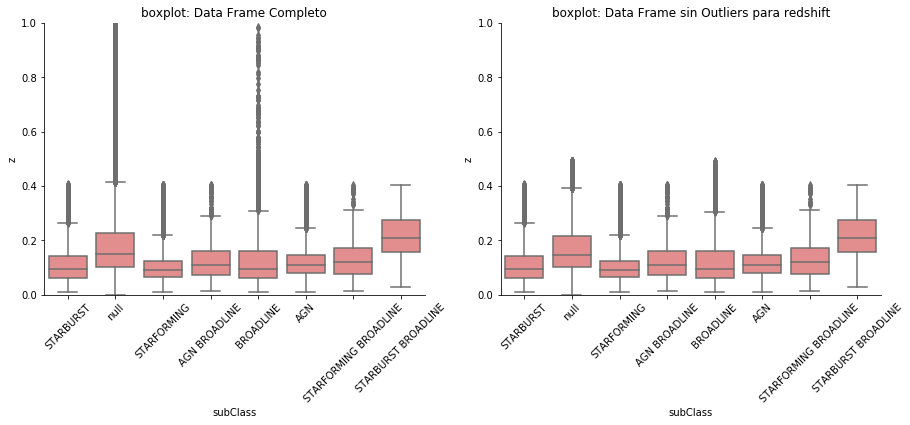

In [39]:
# Gráfico boxplot para identificar outlaiers en la variable "redshift"

plt.figure (figsize=(15,5))

plt.subplot(121)
plt1=seaborn.boxplot(data=data_norm, color='lightcoral', y='z', x='subClass')
plt.ylim(0,1)
plt.title('Redshift: Data Frame Completo')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(122)
plt2=seaborn.boxplot(data=data_clean, color='lightcoral', y='z', x='subClass')
plt.ylim(0,1)
plt.title('Redshift: Data Frame sin Outliers')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

### <span style="color:blue"> Vero: Que opinanan??? los filtramos o no??? sugieren filtrar las otras variables tmb???</span>

### **1.5)** Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?

**NOTA:** Las variables más importantes a considerar en este estudio serían las magnitudes de las galaxias, en las distintas bandas fotométricas, así como la posicion angular en el cielo de las mismas y el redshift obtenido a partir de la espectroscopia.

### **1.6)** Implementar herramientas en pos de la reproducibilidad de resultados.
**NOTA:** Para asegurar la reproducibilidad de los resultados, optamos por crear un contenedor en **DOCKER**. Detallaremos todos los requisitos en el **Dockerfile**.

---------------------------------------------------

# **Resolución Punto 2 - Análisis estadístico**

### **2.1)** Nos ha contado el especialista que del proceso de adquisición de los mismos se asegura que los datos son correctos y/o completos para aquellos objetos que tienen Magnitudes Pretosian en la banda r entre 14.5 y 17.77. Incluyan esta selección en su análisis.

### **2.2)** Explorar la base de datos en búsqueda de datos repetidos, en caso de hallarlos elegir la estrategia para su limpieza.

### **2.3)** Dado que los datos son recolectados a través de mapeos sucesivos del cielo es posible que una galaxia sea observada más de una vez, y en cada observación se le asigne un ID diferente. Propongan una idea para defectar la base de datos de este problema.
* **Extra**: el especialista en datos no confía en objetos que tengan una separación angular con otro objeto menor a 1" de arco. Intenten limpiar los datos empleando este criterio.

### **2.4)** Propongan una estrategia para tratar los datos faltantes (en algunas columnas los datos faltantes fueron sustituidos por valores extremos). Quitar o imputar?. Calcular los estadísticos de las distribuciones resultantes.


### **2.5)** Añadir los campos con los colores calculados tanto para magnitudes petrosian como magnitudes model.


### **2.6)** En función de las correlaciones observadas en el práctico anterior, y con respecto a nuestra variable objetivo, propongan qué variables se podría excluir del dataset. 


### **2.7)** Guardar el dataset "limpio" y generar un archivo README que contenga todos los pasos implementados en la curación de los datos.


### **2.8)** Armen un contenedor de docker con las versiones exactas de todas las bibliotecas utilizadas.